<a href="https://colab.research.google.com/github/zbuitrago/Trabajo-3/blob/main/Zuly_Preliminar_trabajo_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fundamentos de programación para analítica de datos.**
>>**Maestría en Analítica de Datos**

>>**Facultad de Ingeniería y Ciencias Básicas.**

>>**Universidad Central  2020 - II**

>>**Presentación Trabajo 3: Calidad de los datos**


>>**Integrantes:**

> > Zuly Buitrago Castillo

> > Jennifer Prada Urbina,

> > Oscar Ochoa Bueno

>>**Contenido:**
1. Requerimiento
2. Desarrollo e implentacion
  *   Desarrollo lógico
  *   Código implentado
  *   Análisis
3. Conclusiónes


#**1 .Requerimiento**
#Trabajo 3 - Calidad de los datos


Se debe realizar el ejercicio grupal de la práctica desarrollada en la semana 11,
correspondiente a Calidad de los datos . A continuación se enumeran las actividades del
ejercicio que se debe realizar tomando como base el archivo examen3.xlsx (adjunto).
1. Hacer una función que crea un dataframe a partir de los atributos de los datos de
entrada examen3.xlsx , los cuales son:
a. Nombre de la columna del dataframe de entrada
b. Tipo de dato (incluido: int, float, string, datetime, boolean)
c. Tipo de variable (Continua, numérica discreta, categórica)
d. Cantidad de valores únicos
e. Cantidad de valores nulos
f. Valor que más se repite
g. Frecuencia del valor que más se repite
h. Valor máximo
i. Valor mínimo
2. Analice el tipo de dato de cada columna para saber si es el correcto. Si no lo es,
determine los valores que generan problemas y clasifique los tipos de problemas
que aparecen. Luego cree una función que corrija los valores erróneos, y finalmente,
verifique que queda el tipo correcto en cada columna. Reporte los datos que cambió.
3. Haga una gráfica de distribución univariada por cada columna. En caso de tener una
variable categórica y si la cantidad de valores únicos es menor a la raíz cuadrada de
la cantidad de registros, haga una gráfica de barras de mayor a menor de la
frecuencia de cada categoría. La gráfica con un máximo de hasta 20 barras y el
resto se agrupan en una sola barra llamada “ otras ”. Analice cada una de las gráficas.
4. Para las variables numéricas, haga un mapa de correlación y analice qué variables
tienen una fuerte relación. Luego, haga un gráfico de distribución bivariada con las
columnas que tienen una fuerte relación y use esto para deducir reglas entre las
variables.
5. Para las variables categóricas y ordinales busque relaciones de jerarquía entre las
clases. Si hay relación entre las categorías pinte un árbol mostrando esta.
Finalmente, deduzca las reglas de relación entre las variables.
6. Haga un análisis de los valores faltantes, determine si se presenta algún problema
de integridad con la ausencia de los datos. Si es así, use las reglas definidas entre
las variables para rellenar con el dato apropiado. Reporte los cambios.
7. Analice la ocurrencia de datos duplicados con todos los atributos y con las
columnas: {IDE, curso, créditos}. Evalúe si es necesario eliminar registros duplicados para mejorar la calidad de los datos, en tal caso proceda a eliminarlos y reporte las
acciones realizadas.
8. Identifique, analice y si es posible corrija valores atípicos encontrados en las
columnas. Reporte los cambios realizados.
9. Teniendo en cuenta el siguiente problema: " Analizar el desempeño de los
estudiantes en el examen y el resto del semestre, relacionado con el profesor, el
grupo, el programa académico, y la jornada " determine e indique qué filas y
columnas no son relevantes para este análisis y se pueden filtrar. Finalmente,
genere el dataframe depurado con la mejor calidad que se pudo obtener para la
tarea que se plantea en este punto.
10. Genere conclusiones acerca de todo el proceso de calidad de datos aplicado a la
base entregada. Haga una evaluación de la calidad del resultado final y haga
recomendaciones para hacer este proceso en el futuro.


#**2 .Desarrollo  e implementación**


## **2.1. Función de Dataframe de atributos**

> Se requiere crea un dataframe que describa los atributos del archivo de entrada **examen3.xlsx** 


### **Desarrollo lógico**

1 . Carga de archivo *examen3.xlsx* 

2 . Definir una función que reciba el dataframe de entrada y retorne un dataframe con los atributos especificados

> 2.1. Crear un dataframe. Donde cada columna tomará el nombre de uno de los nueve atributos solicidados en punto 1

> 2.2. Iterar el dataframe de entrada para obtener el nombre de la columna y la data por cada columna

>2.3. Definir una función que reciba el nombre y data por columna y que retorne un arreglo con los atributos evaluados

>>2.3.1. Definir un arreglo para almacenar el resultado por cada atributo evaluado

>>2.3.2. Obtener el nombre de la columna

>>2.3.3. Evaluar el tipo de dato por columna 

>>2.3.4. Evaluar el tipo de variable por columna

>>2.3.5. Determinar valores únicos por columna

>>2.3.6. Determinar valores nulos por columna

>>2.3.7. Determinar el valor que más se repite 

>>2.3.8. Determinar la frecuencia del valor que más se repite

>>2.3.9. Evaluar el valor máximo y mínimo por columna.tener presente el tipo de dato y para las columnas que no son de tipo númerico asignar valor de no aplica -->*NA* 

> 2.4. Asignar data evaluada en el dataframe de atributos a la columna correspondiente de cada valor

>2.5. Retornar dataframe de attributos




1. 

###**Código Implementado**

### importar data

In [63]:
# Librerias 
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from pylab import *
from scipy import stats
import statistics
from scipy.stats import mode
from numpy import nan
from datetime import datetime
from plotly.subplots import make_subplots

# importar archivo
df = pd.read_excel('examen3.xlsx')


In [2]:
def create_attribute_df(df):
  '''create_attribute_df: función que crea dataframe con atributos de dataframe entrante 
                  Argumentos:
                        df:(Requerido) recibe dataframe  
                         
                  Retorno: 
                        attribute_df: dataframe resultante por cada fila tiene la evaluación de cada atributo especificado a continuación:
                            column_names: nombre de la columna
                            data_type: tipo de dato expresado ( int, float, string, datetime, boolean)
                            variable_type : clasificación de variable en:Continua, numérica discreta, categórica
                            quantity_unique_values:Cantidad de valores únicos
                            quantity_null_values: Cantidad de valores nulos
                            most_repeated_value:Valor que más se repite 
                            frec_most_repeated_value: Frecuencia del valor que más se repite
                            max_value:Valor máximo
                            min_value:Valor mínimo
                         ''' 

  # Crear dataframe con los atributos solicitados 
  attribute_df = pd.DataFrame(columns=['column_names','data_type','variable_type','quantity_unique_values','quantity_null_values','most_repeated_value','frec_most_repeated_value','max_value','min_value'])
  # Recorrer el dataframe por columnas y obtener la data de cada una
  for (columnname,columndata) in df.iteritems():
    # Capturar los valores calculados
    data=get_column_data(columnname,columndata)
    # identificar el siguiente index 
    attribute_df_length=len(attribute_df)
    # asignar datos al ultimo index 
    attribute_df.loc[attribute_df_length]=data
  #display(attribute_df)
  return attribute_df
 
  
  
def get_column_data(columnname,columndata): 
  '''get_column_data: función que crea un arreglo resultado 
                  Argumentos:
                        columnname:(Requerido) recibe el nombre de la columna
                        columndata:(Requerido) recibe los datos de la columna
                         
                  Retorno: 
                        attributes: es un arreglo donde cada posición es el resultado de la evaluación de un atributo, descripción por posición
                            [0]=column_names : nombre de la columna
                            [1]=data_type: tipo de dato expresado ( int, float, string, datetime, boolean)
                            [2]=variable_type : clasificación de variable en:Continua, numérica discreta, categórica
                            [3]=quantity_unique_values:Cantidad de valores únicos
                            [4]=quantity_null_values: Cantidad de valores nulos
                            [5]=most_repeated_value:Valor que más se repite 
                            [6]=frec_most_repeated_value: Frecuencia del valor que más se repite
                            [7]=max_value:Valor máximo
                            [8]=min_value:Valor mínimo
                         ''' 

  # Definir arreglo 
  attributes=[]
  # Capturar nombre de la columna
  attributes.append(columnname)
  # tipo de dato
  attributes.append(get_column_type(columndata))
  # tipo de variable
  attributes.append(get_varible_type(get_column_type(columndata)))
  # Valores unicos
  attributes.append(len(columndata.unique()))
  # Valores nulos
  attributes.append(len(columndata[columndata.isnull()]))
  # Valor que mas se repite
  attributes.append(columndata.value_counts().idxmax())
  # Frecuencia del valor que mas se repite
  attributes.append(columndata.value_counts().max())
  # Valor máximo 
  if get_column_type(columndata)!='string':
    
    attributes.append(max(columndata))
  # Valor mínimo
    attributes.append(min(columndata))
  elif get_column_type(columndata)=='string':
    attributes.append('NA')
    attributes.append('NA')

  return attributes

def get_column_type(columndata): 
  '''get_column_type: función evalua el tipo de dato y lo normaliza 
                  Argumentos:
                        columndata:(Requerido) recibe los datos de la columna                       
                  Retorno: 
                        columntypef: string que especifica el tipo de dato normalizado
                         ''' 
  # Determinar el tipo de dato por columna
  columntype=columndata.dtypes
  columntypef=''
  # Renombrar el tipo de dato 
  if columntype=='int64':
    columntypef='int'
  if columntype =='float64':
    columntypef='float'
  if columntype=='bool':
    columntypef='boolean'
  if columntype =='datetime64[ns]':
    columntypef='datetime'
  if columntype =='object':
    columntypef='string'
  
      
  return columntypef

def get_varible_type (datatype):
  '''get_varible_type: función que retorna el tipo de variable según el tipo de dato de la columna 
                  Argumentos:
                        datatype:(Requerido) recibe el tipo de dato de la columna                       
                  Retorno: 
                        datatype: string que especifica el tipo de variable 
                         ''' 
  # clasificación de tipo de variable 
  if datatype=='int': return 'Discreta'
  if datatype=='float' or datatype=='datetime': return 'Continua'
  if datatype=='boolean': return 'Cualitativa Dicotomica'
  if datatype=='string': return 'Categorica'



In [3]:
create_attribute_df(df)

,column_names,data_type,variable_type,quantity_unique_values,quantity_null_values,most_repeated_value,frec_most_repeated_value,max_value,min_value
0,IDE,int,Discreta,617,0,1615,2,2116,1500
1,programa,string,Categorica,7,0,Ingeniería Ambiental,236,NA,NA
2,IDG,string,Categorica,33,0,G9,24,NA,NA
3,corte1,float,Continua,11,0,4,146,5,0
4,corte2,float,Continua,11,0,3,115,5,0
5,prom,float,Continua,21,0,3.75,86,5,0
6,fallas,string,Categorica,25,0,0,494,NA,NA
7,fallaP,float,Continua,22,0,0,497,294.12,0
8,curso,string,Categorica,1,0,Algoritmos y programación,630,NA,NA
9,creditos,int,Discreta,1,0,3,630,3,3


### **Análisis**

In [4]:
print('Dataframe de atributos')
display(create_attribute_df(df).head(2))
print("")
print('Se puede observar que desde una lectura inicial del dataframe de entrada es posible evaluar  diferentes atributos')

Dataframe de atributos


,column_names,data_type,variable_type,quantity_unique_values,quantity_null_values,most_repeated_value,frec_most_repeated_value,max_value,min_value
0,IDE,int,Discreta,617,0,1615,2,2116,1500
1,programa,string,Categorica,7,0,Ingeniería Ambiental,236,NA,NA



Se puede observar que desde una lectura inicial del dataframe de entrada es posible evaluar  diferentes atributos


##2.2. Análisis del dataframe resultante del punto 2.1 y ajuste de data

> Se requiere verificar el dataframe resultante del punto 2.1 y determinar si el tipo de dato por columna es correcto. de no serlo se debe realizar los respectivos ajustes para obtenerlo 


### **Desarrollo lógico**

1. Comparar el dataframe de entrada si el tipo de dato concuerda con el resultado del punto 2.1

2. Determinar las columnas con valores que generan problemas  
    * Evaluar el tipo de dato es correcto
    * Deteminar los valores que generan el error
    
3. Aplicar las modificaciones correspondentes para obtener un resultado valido en dataframe del punto 2.1
    * Crear una copia del dataframe de entrada
    * Evaluar el tipo de dato por cada fila en cada columna 
    * Realizar un conteo para determinar la mayoria de datos a que tipo de dato   corresponde
    * Reemplazar los datos errados por un valor valido según el tipo de dato que corresponde a la columna

###**Código Implementado**

In [5]:
def fix_column_data(df): 
  '''fix_column_data: función que modifica el tipo de  dato de las columnas que tienen algún o algunos registros errados;
                        remplazando datos string por 0 en columnas que deben ser int o float y en las columnas string reemplaza
                        los valores númericos por un valor vacio

                  Argumentos:
                        df:(Requerido) dataframe de entrada
                                                
                  Retorno: 
                        fixed_df: copia del dataframe de entrada con algunas columnas modificadas en el tipo de dato de la columna
                        ''' 


  # Copiar el dataframe de entrada
  fixed_df=df.copy()  
  # Iterar dataframe y obtener el nombre de la columna y los datos de cada una
  for (columnname,columndata) in fixed_df.iteritems():
  # Evaluar las todas las columnas que son tipo object
    if columndata.dtypes =='object':
      # Intentar convertir la columna en datetime
      try:
        fixed_df[columnname]=pd.to_datetime(columndata)
        #fixed_df[columnname]=pd.to_timedelta(columndata)
      
      except:
      # Evaluar por cada fila el tipo de dato que se tiene
        intsum=0
        stringsum=0
        floatsum=0
        issuestring,issueint=[],[]
        for row in columndata:
        # Contar la cantidad de datos por cada tipo de dato y crear un arreglo de los datos evaluados 
          if isinstance(row,int):
            intsum=intsum + 1
            issueint.append(row)
          elif isinstance(row,float):
            floatsum=floatsum + 1
            issueint.append(row)
          elif isinstance(row,str):
            stringsum= stringsum+1
            issuestring.append(row)
        # crear un diccionario con el resultado del conteo 
        typesdict={'int':intsum,'float':floatsum,'str':stringsum}
        # Ordenar el diccionario
        sort_type=sorted(typesdict.items(),key=lambda x:x[1],reverse=True)
        # Tomar la primera ubicación del diccionario 
        columntypef=sort_type[0][0]
        # Evaludar por el resultado de la variable anterior por que se reemplaza el valor errado
        if columntypef== 'int' or columntypef== 'float':
          fixed_df.loc[fixed_df[columnname].isin(issuestring), columnname] = 0.0
          fixed_df[columnname] = pd.to_numeric(fixed_df[columnname])

        elif columntypef== 'str':
          fixed_df.loc[fixed_df[columnname].isin(issueint), columnname] = None
          fixed_df[columnname] = fixed_df[columnname]

  return fixed_df




In [6]:
print("Dataframe resultante \n")
display(fix_column_data(df).head(3))

Dataframe resultante 



,IDE,programa,IDG,corte1,corte2,prom,fallas,fallaP,curso,creditos,IDP,nestud,periodo,año,jornada,profesor,dedicacion,nsala,sala,horaExamen,inicio,final,nota,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10
0,1521,Ingeniería Ambiental,G11,4.0,2.0,3.00,0,0.00,Algoritmos y programación,3,201,23,2,2017,día,Patroclo,TC,20,Torre P Salón 303,2020-11-25 09:00:00,2020-11-25 09:16:00,2020-11-25 10:31:00,1.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.0
1,1572,Ingeniería Industrial,G11,3.0,3.0,3.00,0,0.00,Algoritmos y programación,3,201,23,2,2017,día,Patroclo,TC,3,Casa Kra 4ta Salón 301,2020-11-25 09:00:00,2020-11-25 09:14:00,2020-11-25 09:47:00,2.0,0.0,0.0,0.0,0.0,0.5,0.5,0.0,0.5,0.0,0.5
2,1585,Ingeniería Electórnica,G11,4.5,4.0,4.25,2,11.76,Algoritmos y programación,3,201,23,2,2017,día,Patroclo,TC,3,Casa Kra 4ta Salón 301,2020-11-25 09:00:00,2020-11-25 09:12:00,2020-11-25 09:47:00,4.0,0.5,0.0,0.5,0.5,0.5,0.0,0.5,0.5,0.5,0.5


### **Análisis**

**Análisis sin editar datos**

In [7]:
# Cargue de dataframe del punto 2.1
attribute_df=create_attribute_df(df)
print("Resultado de los atributos de la columna fallas")
display(attribute_df[attribute_df.column_names=='fallas'])
print("")
# Visualidar valores unicos de la columna fallas 
print('Valores unicos de la columna fallas',df.fallas.unique())
print("")
print("Se evidencia que la columna fallas tiene datos errados para el tipo de columna como lo son: nada,ninguna y no.")
print("Esto nos genera un error al momento de evaluar le tipo de dato de la columna. Además de no evaluar correctamente\n"
      "los atributos de máximo, mínimo,valor que más se repite y su frecuencia.")

Resultado de los atributos de la columna fallas


,column_names,data_type,variable_type,quantity_unique_values,quantity_null_values,most_repeated_value,frec_most_repeated_value,max_value,min_value
6,fallas,string,Categorica,25,0,0,494,NA,NA



Valores unicos de la columna fallas [0 2 5 3 4 1 8 6 15 19 37 7 50 30 'nada' 'ninguna' 27 12 10 11 32 18 20 26
 'no']

Se evidencia que la columna fallas tiene datos errados para el tipo de columna como lo son: nada,ninguna y no.
Esto nos genera un error al momento de evaluar le tipo de dato de la columna. Además de no evaluar correctamente
los atributos de máximo, mínimo,valor que más se repite y su frecuencia.


In [8]:
print("Resultado de los atributos de la columnas horaExamen,inicio,final")
display(attribute_df[attribute_df.column_names.isin(['horaExamen','inicio','final'])])
#Mirar que datos tienen las columnas horaExamen,inicio,final
print('Valores unicos de la columna horaExamen:\n',df.horaExamen.unique())
print("")
print('Valores unicos de la columna inicio:\n',df.inicio.unique()[:10])
print("")
print('Valores unicos de la columna final:\n',df.final.unique()[:10])
print("")
print("Se evidencia que las columnas horaExamen,inicio,final son de tipo datetime.")
print("Esto nos genera un error al momento de clasificar la variable . Además de no evaluar correctamente\n"
      "los atributos de máximo, mínimo.")

Resultado de los atributos de la columnas horaExamen,inicio,final


,column_names,data_type,variable_type,quantity_unique_values,quantity_null_values,most_repeated_value,frec_most_repeated_value,max_value,min_value
19,horaExamen,string,Categorica,2,0,9:00 a.m.,396,NA,NA
20,inicio,string,Categorica,64,104,09:11:00,34,NA,NA
21,final,string,Categorica,136,104,10:21:00,14,NA,NA


Valores unicos de la columna horaExamen:
 ['9:00 a.m.' '6:00 p.m.']

Valores unicos de la columna inicio:
 ['09:16:00' '09:14:00' '09:12:00' '09:13:00' '09:06:00' '09:08:00'
 '09:10:00' '09:24:00' '09:45:00' '09:11:00']

Valores unicos de la columna final:
 ['10:31:00' '09:47:00' '09:59:00' '09:39:00' '10:00:00' '10:37:00'
 '10:07:00' '09:53:00' '10:36:00' '10:17:00']

Se evidencia que las columnas horaExamen,inicio,final son de tipo datetime.
Esto nos genera un error al momento de clasificar la variable . Además de no evaluar correctamente
los atributos de máximo, mínimo.


**Análisis de datos modificados**

In [9]:
# Asignar función de cambios de tipo de datos a nuevo dataframe 
fixed_df=fix_column_data(df)
# Evaluar de nuevo la función del punto 2.1
attribute_df=create_attribute_df(fixed_df)
# Evaluar si el tipo de datos se modificaron el daframe de atributos
display(attribute_df[attribute_df.column_names.isin(['fallas','horaExamen','inicio','final'])])
print("En la siguiente tabala se muestra las columnas fallas,horaExamen,inicio,final ya cuentan con el tipo de dato correcto")


,column_names,data_type,variable_type,quantity_unique_values,quantity_null_values,most_repeated_value,frec_most_repeated_value,max_value,min_value
6,fallas,int,Discreta,22,0,0,497,50,0
19,horaExamen,datetime,Continua,2,0,2020-11-25 09:00:00,396,2020-11-25 18:00:00,2020-11-25 09:00:00
20,inicio,datetime,Continua,64,104,2020-11-25 09:11:00,34,2020-11-25 18:44:00,2020-11-25 09:03:00
21,final,datetime,Continua,136,104,2020-11-25 10:21:00,14,2020-11-25 19:58:00,2020-11-25 09:28:00


En la siguiente tabala se muestra las columnas fallas,horaExamen,inicio,final ya cuentan con el tipo de dato correcto


##2.3. Analisis grafico 

> Realizar analisis grafico por columnas 

### **Desarrollo lógico**

1. Seleccionar dataframe resultante del punto 2.2

2. Determinar las columnas con datos atípicos 
    
3. Aplicar las modificaciones correspondentes sobre la columna con anomalías 


###**Código Implementado**

In [10]:
# Dataframe a emplear es fixed_df
# 1. Columna de programa presenta variación en la forma de escritura
fixed_df.programa = fixed_df.programa.replace({'Ingeniería Electórnica': 'Ingeniería Electrónica'})
fixed_df.programa = fixed_df.programa.replace({'Ingeniería Industial': 'Ingeniería Industrial'})
# 2. Corregir IDP 
IDP_irregular=fixed_df[fixed_df.IDP==208]
fixed_df.loc[fixed_df.IDP==208,'profesor']='Menelao'
IDP_irregular.profesor.unique()
IDP_irregularf=fixed_df[fixed_df.IDP==204]
IDP_irregularf.profesor.unique()


array(['Eneas'], dtype=object)



```
# This is formatted as code
```

### **Análisis**

**Análisis sin editar datos**

**Análisis de datos modificados**

In [12]:
fixed_df.programa.value_counts()

Ingeniería Ambiental      236
Ingeniería De Sistemas    144
Ingeniería Electrónica    110
Ingeniería Industrial      81
Ingeniería Mecánica        59
Name: programa, dtype: int64

In [13]:
fixed_df.columns

Index(['IDE', 'programa', 'IDG', 'corte1', 'corte2', 'prom', 'fallas',
       'fallaP', 'curso', 'creditos', 'IDP', 'nestud', 'periodo', 'año',
       'jornada', 'profesor', 'dedicacion', 'nsala', 'sala', 'horaExamen',
       'inicio', 'final', 'nota', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7',
       'p8', 'p9', 'p10'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning:

This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 



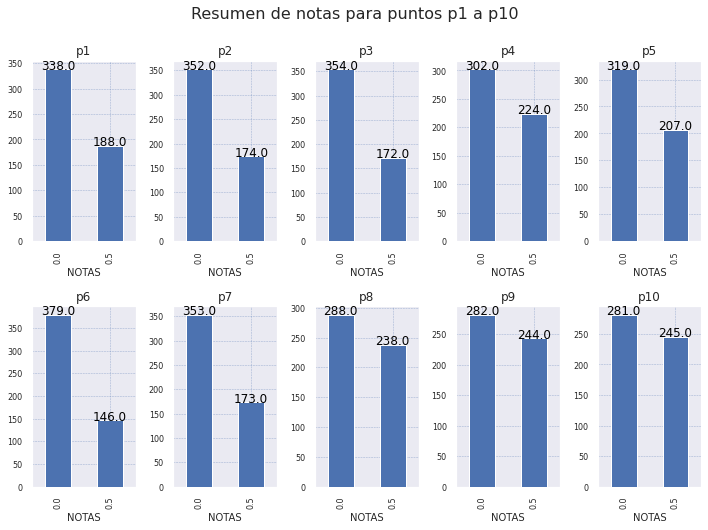

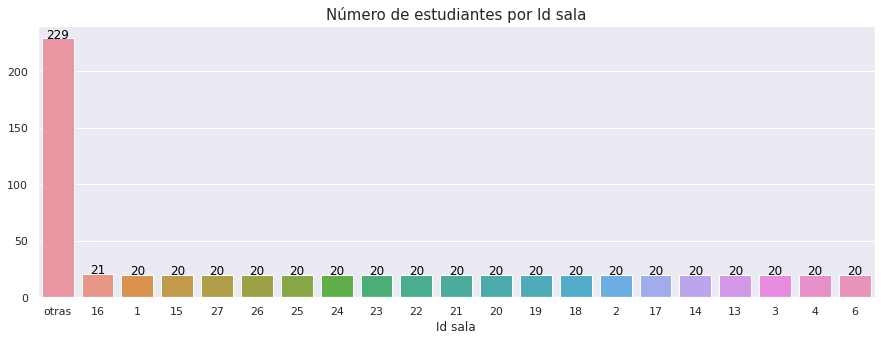

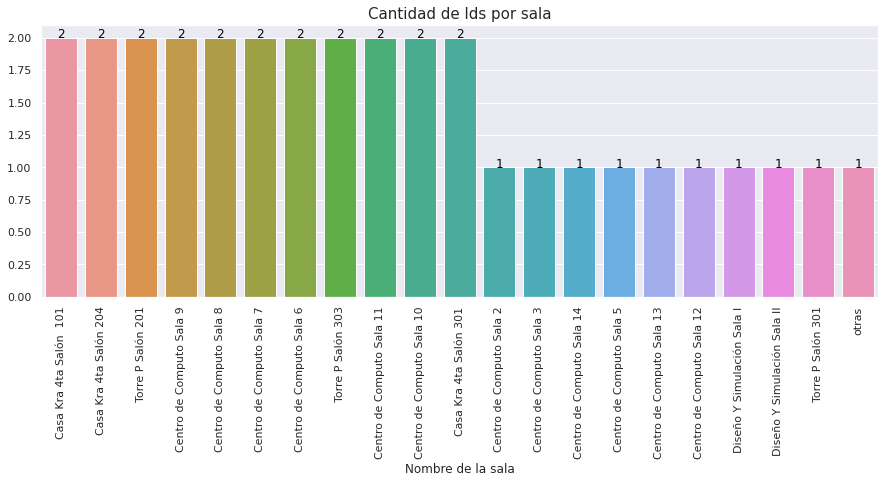

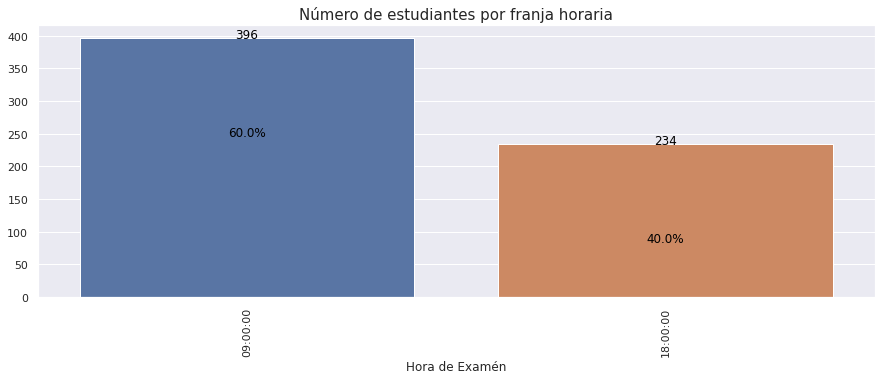

In [149]:
from pylab import *
# gráfico de columnas de p1 a p10
# Definir espacio 
figure332, axs = plt.subplots(1,1,figsize=(10,7),constrained_layout=True)
# Título
figure332.suptitle('Resumen de notas para puntos p1 a p10', fontsize=16,y=1.05)
# lista de columnas a emplear
notas=["p1", "p2", "p3", "p4","p5","p6","p7","p8","p9","p10"]
i=1
# recorrido de columnas 
for p in notas:
  # definición de subplot
  subplot(2,5,i)
  # datos 
  dfp = fixed_df[p].value_counts().rename_axis('unique_values').reset_index(name='counts')
  # gráfico
  fig_318 = fixed_df[p].value_counts().plot(kind='bar',fontsize=8,align='center',zorder=3)
  # etiquetas
  fig_318.axes.set_title(p,fontsize=12)
  fig_318.set_xlabel("NOTAS",fontsize=10)
  for index, col in dfp.iterrows():
    fig_318.text(col.name, col.counts, round(col.counts,0), color = 'black', ha = "center")
  fig_318.grid(color='b',alpha=0.5,linestyle='dashed',linewidth=0.5,zorder=0)
  i=i+1
figure332.tight_layout()
# gráfico de nsala 
# Crear primera agrupación por nsala 
merge=fixed_df.groupby(by=["nsala"], dropna=False).agg({'IDE':'count'}).sort_values(['IDE'], ascending=[False])
# Reiniciar index
merge.reset_index(inplace = True) 
# seleccionar los 20 top del groupby
merge['nsala']=where(merge.index<=19,merge['nsala'],"otras")
# Crear categoria de "otras" con los resultados no top
merge2=merge[merge.index>=20]
merge2=merge2.groupby(by=["nsala"], dropna=False).agg({'IDE':'sum'}).sort_values(['IDE'], ascending=[False])
merge=merge[merge.index<=19]
merge2.reset_index(inplace = True) 
merge = pd.concat([merge2, merge])
merge.reset_index(inplace = True) 
# gráficar
fig3_16, ax = plt.subplots(figsize = (15, 5))
sns.barplot(x='nsala', y='IDE', data=merge, ax = ax)
plt.title("Número de estudiantes por Id sala",fontsize=15)
plt.xlabel("Id sala")
plt.ylabel("")
for index, col in merge.iterrows():
  plt.text(col.name, col.IDE, round(col.IDE,0), color = 'black', ha = "center")

# Números de id por nombre de sala
merge=fixed_df.groupby(by=["sala"], dropna=False).agg({'nsala':'nunique'}).sort_values(['nsala'], ascending=[False])
# Reiniciar index
merge.reset_index(inplace = True) 
merge['sala']=where(merge.index<=19,merge['sala'],"otras")
# gráficar
fig3_15, ax = plt.subplots(figsize = (15, 5))
sns.barplot(x='sala', y='nsala', data=merge, ax = ax)
plt.title("Cantidad de Ids por sala",fontsize=15)
plt.xlabel("Nombre de la sala",fontsize=12)
plt.xticks(rotation=90)
sns.set(rc={'figure.figsize':(10,6.)})
plt.ylabel("")

for index, col in merge.iterrows():
  plt.text(col.name, col.nsala, round(col.nsala,0), color = 'black', ha = "center")
# Hora de examén
fixed_dfm=fixed_df.copy()
fixed_dfm["horaExamen"]=[d.time()  for d in fixed_df["horaExamen"]]
merge=fixed_dfm.groupby(by=["horaExamen"], dropna=False).agg({'IDE':'count'}).sort_values(['IDE'], ascending=[False])
# Reiniciar index
merge.reset_index(inplace = True) 
fig3_18, ax = plt.subplots(figsize = (15, 5))
sns.barplot(x='horaExamen', y='IDE', data=merge, ax = ax)
plt.title("Número de estudiantes por franja horaria",fontsize=15)
plt.xlabel("Hora de Examén",fontsize=12)
plt.xticks(rotation=90)
sns.set(rc={'figure.figsize':(10,6.)})
plt.ylabel("")
meanhe = fixed_df['IDE'].count()

for index, col in merge.iterrows():
  plt.text(col.name, col.IDE, round(col.IDE,0), color = 'black', ha = "center")
  plt.text(col.name, col.IDE-150, "{}%".format(round(col.IDE/meanhe,1)*100), color = 'black', ha = "center")
# Hora de inicio de examén
fixed_dfmh=fixed_df.copy()

fixed_dfmh["final"]=fixed_df["final"].dt.strftime('%H:%M')
fixed_dfmh["inicio"]=fixed_df["inicio"].dt.strftime('%H:%M')
fixed_dfmh["final"].fillna("No presento",inplace=True)
fixed_dfmh["inicio"].fillna("No presento",inplace=True)
inicio18=fixed_dfmh[fixed_dfmh["horaExamen"]=='6:00 p.m']
inicio9=fixed_dfmh[fixed_dfmh["horaExamen"]=='9:00 a.m']

inicio18=inicio18.groupby(by=["inicio","horaExamen"], dropna=False).agg({'IDE':'count'}).sort_values(['IDE'], ascending=[False])
inicio9=inicio9.groupby(by=["inicio","horaExamen"], dropna=False).agg({'IDE':'count'}).sort_values(['IDE'], ascending=[False])

# Reiniciar index
inicio9.reset_index(inplace = True) 
inicio18.reset_index(inplace = True) 
# seleccionar los 20 top del groupby
inicio9['inicio']=where(inicio9.index<=19,inicio9['inicio'],"otras")
inicio18['inicio']=where(inicio18.index<=19,inicio18['inicio'],"otras")
# Crear categoria de "otras" con los resultados no top
merge29=inicio9[inicio9.index>=20]
merge218=inicio18[inicio18.index>=20]
merge29=merge29.groupby(by=["inicio","horaExamen"], dropna=False).agg({'IDE':'sum'}).sort_values(['IDE'], ascending=[False])
merge218=merge218.groupby(by=["inicio","horaExamen"], dropna=False).agg({'IDE':'sum'}).sort_values(['IDE'], ascending=[False])
inicio18=inicio18[inicio18.index<=19]
inicio9=inicio9[inicio9.index<=19]
merge29.reset_index(inplace = True) 
merge218.reset_index(inplace = True) 
inicio18 = pd.concat([merge218, inicio18])
inicio9 = pd.concat([merge29, inicio9])
inicio9.reset_index(inplace = True)
inicio18.reset_index(inplace = True)
inicio9=inicio9.sort_values('IDE', ascending=False)
inicio18=inicio18.sort_values('IDE', ascending=False)
# Hora de finalización de examén
finicio18=fixed_dfmh[fixed_dfmh["horaExamen"]=='6:00 p.m']
finicio9=fixed_dfmh[fixed_dfmh["horaExamen"]=='9:00 a.m']

finicio18=finicio18.groupby(by=["final","horaExamen"], dropna=False).agg({'IDE':'count'}).sort_values(['IDE'], ascending=[False])
finicio9=finicio9.groupby(by=["final","horaExamen"], dropna=False).agg({'IDE':'count'}).sort_values(['IDE'], ascending=[False])

# Reiniciar index
finicio9.reset_index(inplace = True) 
finicio18.reset_index(inplace = True) 
# seleccionar los 20 top del groupby
finicio9['final']=where(finicio9.index<=19,finicio9['final'],"otras")
finicio18['final']=where(finicio18.index<=19,finicio18['final'],"otras")
# Crear categoria de "otras" con los resultados no top
merge29=finicio9[finicio9.index>=20]
merge218=finicio18[finicio18.index>=20]
merge29=merge29.groupby(by=["final","horaExamen"], dropna=False).agg({'IDE':'sum'}).sort_values(['IDE'], ascending=[False])
merge218=merge218.groupby(by=["final","horaExamen"], dropna=False).agg({'IDE':'sum'}).sort_values(['IDE'], ascending=[False])
finicio18=finicio18[finicio18.index<=19]
finicio9=finicio9[finicio9.index<=19]
merge29.reset_index(inplace = True) 
merge218.reset_index(inplace = True) 
finicio18 = pd.concat([merge218, finicio18])
finicio9 = pd.concat([merge29, finicio9])
finicio9.reset_index(inplace = True)
finicio18.reset_index(inplace = True)
finicio9=finicio9.sort_values('IDE', ascending=False)
finicio18=finicio18.sort_values('IDE', ascending=False)


fig3_1 = make_subplots(rows=2, cols=2,y_title='Cantidad de estudiantes',
                    subplot_titles=('Hora inicio de Examén franja de 9:00 a.m',  'Hora inicio de Examén franja de 6:00 p.m', 
                                    'Hora final de Examén franja de 9:00 a.m', 'Hora final de Examén franja de 6:00 p.m'))
fig3_1.append_trace(                 
    go.Bar( x=inicio9['inicio'], y=inicio9['IDE'],marker_color='crimson'),1,1)
fig3_1.append_trace(
    go.Bar(x=inicio18['inicio'], y=inicio18['IDE'],marker_color='lightslategrey'),1,2)
fig3_1.append_trace(
    go.Bar(x=finicio9['final'], y=finicio9['IDE'],marker_color='crimson'),2,1)
fig3_1.append_trace(
    go.Bar(x=finicio18['final'], y=finicio18['IDE'],marker_color='lightslategrey'),2,2)
fig3_1['layout']['xaxis3']['title']='hora'
fig3_1['layout']['xaxis4']['title']='hora'
fig3_1.update_layout(barmode='stack',showlegend=False,
   title_text='Número de Estudiante por hora de inicio de examén', # title of plot
 
    bargap=0.2, # gap between bars of adjacent location coordinates
    bargroupgap=0.1 # gap between bars of the same location coordinates
)


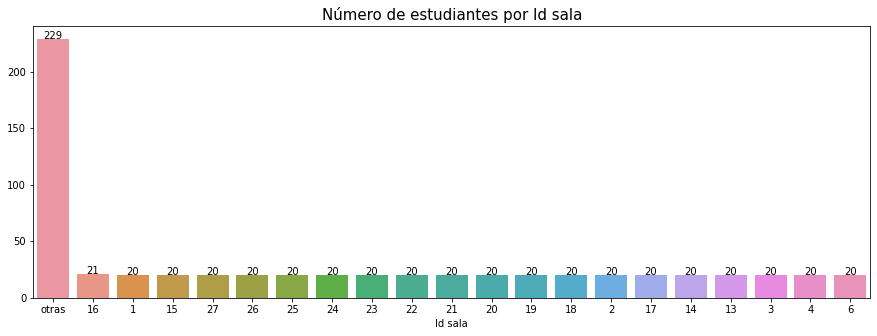

In [15]:
fig3_16

fig3_16 Gráfico del número de estudiantes por el id de cada sala

## Analisis del Gráfico 3.16
* La cantidad promedio de estudiantes por Id de sala es de  19.69
* De los 32 Id de sala se crea una subcategoria de otras de los id (1,17,30,28,8,9,29,10,32,5,7,31). que no se encuentran entre el top 20 


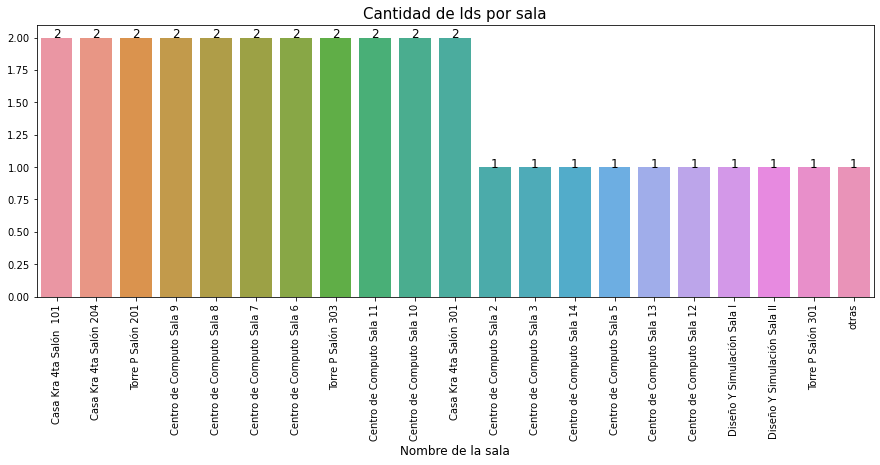

In [16]:
fig3_15

fig3_15 Gráfico del número de id de sala por nombre de sala

## Analisis del Gráfico 3.15
* Se cuenta con 21 salas y 11 de estas tienen dos Id diferentes por el mismo nombre. esto tiene como consecuencia que al evaluar la cantidad de estudiantes por nombre de sala se duplicara
* Solo 10 de las salas cuentan con Id unico


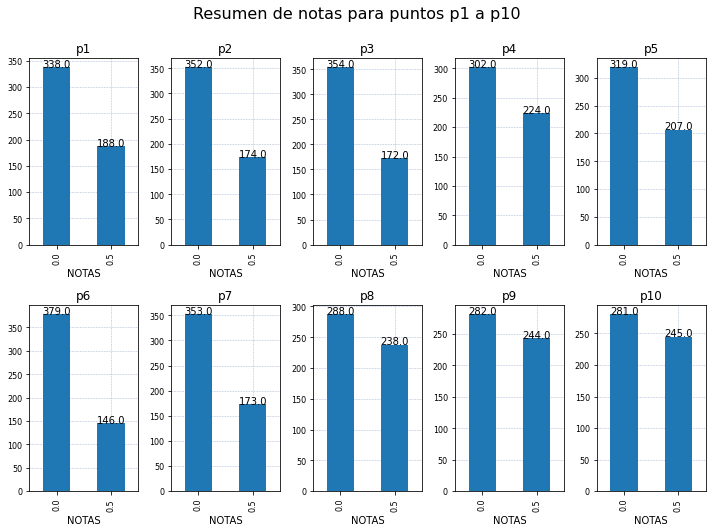

In [17]:
figure332

Gráfico 3.12 Resumen gráfico de las calificaciones por cada punto del exámen

## Analisis del Gráfico 3.12

* Las variables ["p1", "p2", "p3", "p4","p5","p6","p7","p8","p9","p10"]. se tiene el mismo rango de resultado 0.0 o 0.5, por esto se decide realizar un gráfico conjunto
* La cantidad total de registros con notas de 0.5 o 0.0 es de 526, 104 datos se encuentran vacios  
* La nota con mayor concurrencia fue 0.0 en los 10 puntos. Esta nota tiene más del 53% de registros por punto
* Los puntos (p4,p8,p9,p10) son los que tienen más del 40% de respuestas correctas



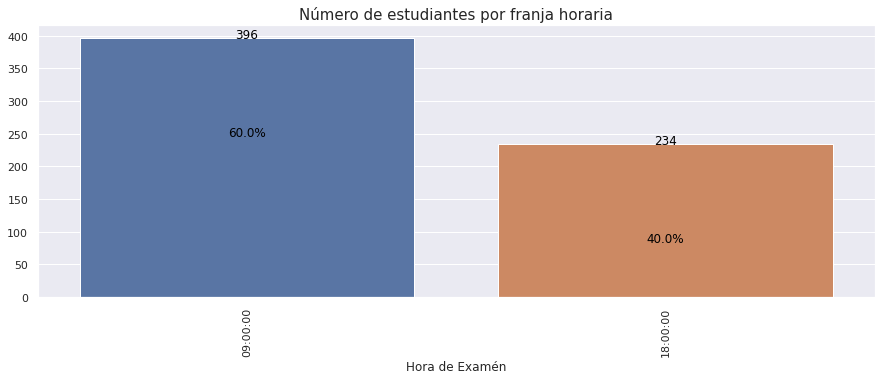

In [18]:
fig3_18

Gráfico 3.18 Número de estudiantes por horario de examén

## Analisis del Gráfico 3.18

* El 60% de estudiantes presentó el examén en la franja de las  9:00  y el 40% lo presento  18:00

In [150]:
fig3_1

Gráfico 3_1 Segmentación de Cantidad de estudiantes por hora de inicio,finalización  y Franja prevista para la presentacion de examén 

## Analisis del Gráfico 3.1

* 104 Estudiantes no presentaron el examén
* 293 Estudiantes iniciaron el examén antes de 9:30 a.m 
* 166 Estudiantes iniciaron el examén antes de 6:30 p.m 
* Del top 20 la mayoria de estudiantes finalizaron el examén en 1 hora


##2.8. Identificar, análizar y corregir posibles datos atípicos 

> Identifique, analice y si es posible corrija valores atípicos encontrados en las columnas

###**Código Implementado**

In [156]:
# Dataframe a emplear es fixed_df
# 1. Columna de programa presenta variación en la forma de escritura
fixed_df.programa = fixed_df.programa.replace({'Ingeniería Electórnica': 'Ingeniería Electrónica'})
fixed_df.programa = fixed_df.programa.replace({'Ingeniería Industial': 'Ingeniería Industrial'})
# 2. Corregir IDP 
IDP_irregular=fixed_df[fixed_df.IDP==208]
fixed_df.loc[fixed_df.IDP==208,'profesor']='Menelao'
IDP_irregular.profesor.unique()
IDP_irregularf=fixed_df[fixed_df.IDP==204]
IDP_irregularf.profesor.unique()


,final,horaExamen,IDE
0,otras,2020-11-25 09:00:00,159


### **Análisis**


**Identificación datos atipicos**

In [165]:
print("Columna de programa\n")
print(df.programa.value_counts())
print("\nLos programas de ingeniería industrial y ingeniería Electrónica,presentan variaciónes en cuanto su escritura")
print("")
# 2. Corregir IDP 
'''IDP_irregular=fixed_df[fixed_df.IDP==208]
fixed_df.loc[fixed_df.IDP==208,'profesor']='Menelao'
IDP_irregular.profesor.unique()
IDP_irregularf=fixed_df[fixed_df.IDP==204]
IDP_irregularf.profesor.unique()
'''
#df.profesor
#df.value_counts(["profesor", "IDP"]).unique


Columna de programa

Ingeniería Ambiental      236
Ingeniería De Sistemas    144
Ingeniería Electrónica     98
Ingeniería Industrial      62
Ingeniería Mecánica        59
Ingeniería Industial       19
Ingeniería Electórnica     12
Name: programa, dtype: int64

Los programas de ingeniería industrial y ingeniería Electrónica,presentan variaciónes en cuanto su escritura



"IDP_irregular=fixed_df[fixed_df.IDP==208]\nfixed_df.loc[fixed_df.IDP==208,'profesor']='Menelao'\nIDP_irregular.profesor.unique()\nIDP_irregularf=fixed_df[fixed_df.IDP==204]\nIDP_irregularf.profesor.unique()\n"

**Reporte de datos Modificados**

In [160]:
print("La columna programa fue modificado en los registros de: Ingeniería Electórnica y Ingeniería Industial ")
fixed_df.programa.value_counts()

La columna programa fue modificado en los registros de: Ingeniería Electórnica y Ingeniería Industial 


Ingeniería Ambiental      236
Ingeniería De Sistemas    144
Ingeniería Electrónica    110
Ingeniería Industrial      81
Ingeniería Mecánica        59
Name: programa, dtype: int64